<h1 align="center">Assignment 2</h1>
<h2 align="center">Programming Machine Learning Applications [DSC 478]</h2>
<h3 align="center">Jonesh Shrestha (2222011)</h3>


In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. **K-Nearest-Neighbor (KNN) classification** on Newsgroups.


#### a. **[5 pts]** Load the data sets, including the train and test matrices as well as the train and test labels. Show the top 20 terms in the decreasing order of total training frequency (total number of occurences of the term across all documents in the training data). Then plot the distribtution of term frequencies in the training data (using a line plot similar to class examples).


In [123]:
train_df = pd.read_csv(
    "newsgroups/trainMatrixModified.txt", delimiter="\t", header=None
)
train_labels_df = pd.read_csv(
    "newsgroups/trainClasses.txt", delimiter="\t", header=None, index_col=0
)
test_df = pd.read_csv("newsgroups/testMatrixModified.txt", delimiter="\t", header=None)
test_labels_df = pd.read_csv(
    "newsgroups/testClasses.txt", delimiter="\t", header=None, index_col=0
)
terms_df = pd.read_csv("newsgroups/modifiedterms.txt", header=None)

In [124]:
train_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [125]:
train_labels_df.head(10)

,1
0,
0,0
1,1
2,0
3,1
4,0
5,1
6,1
7,1
8,1


In [126]:
test_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [127]:
test_labels_df.head(10)

,1
0,
0,1
1,0
2,0
3,1
4,1
5,0
6,1
7,1
8,0


In [128]:
term_frequencies = train_df.sum(axis=1)
term_frequencies.head(10)

0    102.0
1     11.0
2     22.0
3    959.0
4    222.0
5     84.0
6    108.0
7    262.0
8     55.0
9    318.0
dtype: float64

In [129]:
tf_sorted = term_frequencies.sort_values(ascending=False)
tf_sorted.head(20)

3       959.0
225     720.0
136     680.0
1682    578.0
115     545.0
30      483.0
107     470.0
84      429.0
192     401.0
82      378.0
690     370.0
25      329.0
45      326.0
36      325.0
451     323.0
187     319.0
9       318.0
640     311.0
184     302.0
106     300.0
dtype: float64

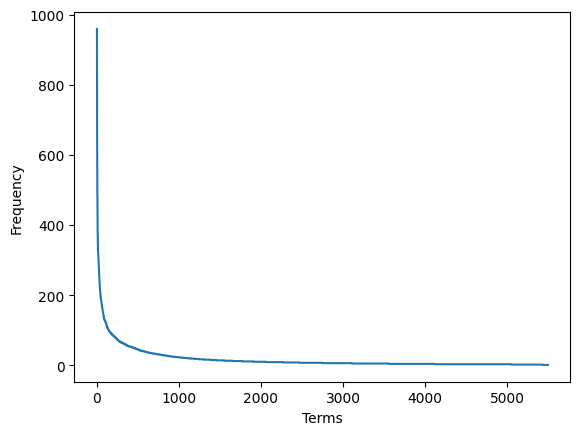

In [130]:
plt.plot(sorted(term_frequencies, reverse=True))
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.show()

_First, I loaded the tab-delimited txt dataset as a dataframe using pandas read_csv function, which also works for txt files. Then I verified the imports with .head(10) to view the top 10 rows. Next, I summed the term frequencies across all documents in the training data using the row-wise operation (axis=1). Then I sorted the term frequencies in descending order and displayed the top 20 terms. Finally, I plotted the distribution of term frequencies in the training data. Since using tf_sorted directly would still include the terms as indices, I used sorted() to extract just the frequency values, which revealed the expected Zipf distribution._


#### b. **[10 pts]** Create your own K-Nearest-Neighbor classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K (number of neighbors), and should return the predicted class for the instance and the indices of the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine distance (which is 1 minus the Cosine similarity). You may create two separate classifiers, or add the distance metric as a parameter in the classifier function (an example implementation of a KNN classifier was provided in class examples). Show that your classifier works by running it on the first two instances in the test data using both Cosine and Euclidean distance in each case.


In [131]:
def knn_search(x, train_X, K, distance_metric):
    """find K nearest neighbors of an instance x among the instances in train_X"""
    if distance_metric == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((train_X - x) ** 2).sum(axis=1))
    elif distance_metric == 1:
        # first find the vector norm for each instance in train_X as well as the norm for vector x
        train_X_norm = np.array(
            [np.linalg.norm(train_X[i]) for i in range(len(train_X))]
        )
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product of x and each instance in train_X by the product of the two norms
        cosine_sims = np.dot(train_X, x) / (train_X_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - cosine_sims
    idx = np.argsort(dists)  # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists


def knn_classify(x, train_X, K, labels, distance_metric):
    from collections import Counter

    neigh_idx, distances = knn_search(x, train_X, K, distance_metric)
    neigh_labels = labels[neigh_idx]
    # count how many neighbors belong to each class
    count = Counter(neigh_labels)
    # print("Labels for top", K, "neighbors:", count)
    x_pred_class = count.most_common(1)[0][0]
    return x_pred_class, neigh_idx

In [132]:
# converting TD to DT
train_X = train_df.to_numpy().T  # (800, 5500)
test_X = test_df.to_numpy().T  # (200, 5500)

train_labels_y = train_labels_df.to_numpy().flatten()  # (800, )

first_test_instance = test_X[0]
second_test_instance = test_X[1]

In [133]:
for name, metric in [("Euclidean", 0), ("Cosine", 1)]:
    print(f"{name} distance:")
    pred_1, idx_1 = knn_classify(
        first_test_instance, train_X, 5, train_labels_y, metric
    )
    pred_2, idx_2 = knn_classify(
        second_test_instance, train_X, 5, train_labels_y, metric
    )
    print(f"First test instance prediction: {pred_1}")
    print(f"Indices of first test instance: {idx_1}")
    print(f"Second test instance prediction: {pred_2}")
    print(f"Indices of second test instance: {idx_2}\n")

Euclidean distance:
First test instance prediction: 1
Indices of first test instance: [685 628 703 266 510]
Second test instance prediction: 0
Indices of second test instance: [798 554 757 224  38]

Cosine distance:
First test instance prediction: 1
Indices of first test instance: [685 628 667 152 427]
Second test instance prediction: 0
Indices of second test instance: [382 775 163 587 550]



_Here, I implemented the KNN classifier function following the example demonstrated in class. Since we need rows to represent samples and columns to represent features, I transposed the train and test dataframes by converting them to numpy arrays. Then, I used a for loop to test the KNN classifier on the first two test instances using both Euclidean and Cosine distance metrics in each case._


#### c. **[10 pts]** Create an evaluation function to measure the accuracy of your classifier. This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label. It should take as input the training data, the training labels, the test instances, the labels for test instances, and the value of K. Your evaluation function should return the Classification Accuracy (ratio of correct predictions to the number of test instances).


In [134]:
test_labels_y = test_labels_df.to_numpy().flatten()

In [135]:
def classifier_eval(
    train_data, train_labels, test_data, test_labels, K, distance_metric
):
    correct_pred = 0
    total_instances = len(test_data)
    for doc in range(total_instances):
        test_data_pred, _ = knn_classify(
            test_data[doc], train_data, K, train_labels, distance_metric
        )
        if test_labels[doc] == test_data_pred:
            correct_pred += 1
    return correct_pred / total_instances

_To create the evaluation function, I first converted the test labels into a numpy array and flattened it to create a 1D array, similar to what I did with train_labels in part (b), since we need to compare predicted labels to test labels to calculate the accuracy. Then I used the knn_classify function created in (b) to obtain predictions for each test instance. I compared each prediction with the corresponding actual test label and summed the total correct predictions, which represents the sum of True Positives (TP) and True Negatives (TN). Finally, I returned the Classification Accuracy, which is the ratio of correct predictions to the total number of test instances._


#### d. **[10 pts]** Run your evaluation function on a range of values for K from 5 to 100 (in increments of 5) in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. Present the results as graphs with K in the x-axis and the evaluation metric (accuracy) on the y-axis. Use a single plot to compare the two version of the classifier (Euclidean distance version vs. cosine similarity version).


In [136]:
euclidean_distance = []
cosine_similarity = []
for K in range(5, 101, 5):
    euclidean_distance.append(
        classifier_eval(train_X, train_labels_y, test_X, test_labels_y, K, 0)
    )
    cosine_similarity.append(
        classifier_eval(train_X, train_labels_y, test_X, test_labels_y, K, 1)
    )

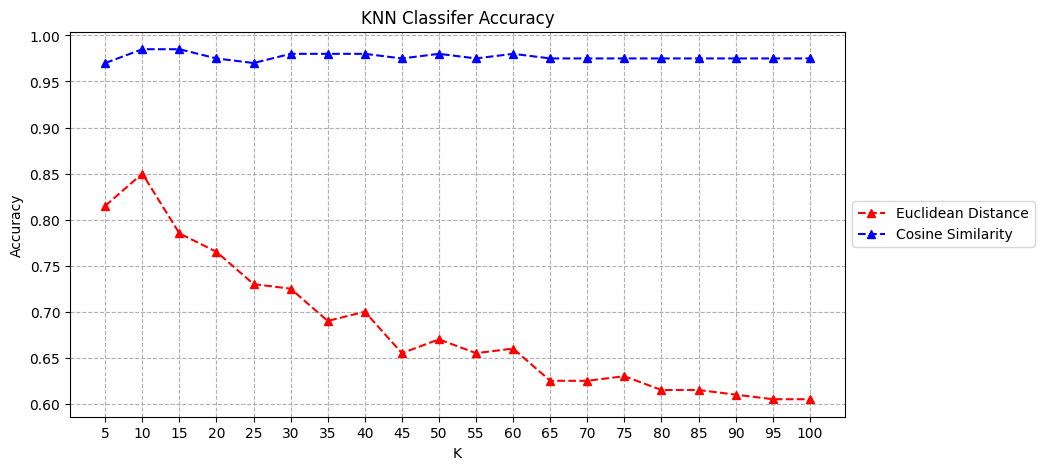

In [137]:
Ks = list(range(5, 101, 5))
plt.figure(figsize=(10, 5))
plt.plot(Ks, euclidean_distance, "r^--", label="Euclidean Distance")
plt.plot(Ks, cosine_similarity, "b^--", label="Cosine Similarity")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN Classifer Accuracy")
plt.grid(linestyle="--")
plt.xticks(Ks)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

_I ran the evaluation function from part (c) for both Euclidean distance and Cosine similarity versions across a range of K values from 5 to 100 (in increments of 5). I stored the results in two arrays to plot the accuracy comparison between Euclidean distance and Cosine similarity for each K value. From this graph, we can observe that Cosine similarity achieves the highest peak accuracy and maintains higher average accuracy overall. The Euclidean distance metric shows declining accuracy on average as K increases, while Cosine similarity appears to be more stable and consistent across different K values._

#### e. **[10 pts]** Next, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). Then, rerun your evaluation (only for the Cosine similarity version of the classifier) on the range of K values (as above) and create a chart comparing the results with and without using TFxIDF weights.


In [138]:
# converting the train_df into document frequency (document counts for each term)
DF = pd.DataFrame((train_df != 0).sum(axis=1))
DF

,0
0,50
1,7
2,10
3,800
4,108
...,...
5495,3
5496,3
5497,2
5498,2


In [139]:
# create a matrix with all entries
Nterms = train_df.shape[0]
NDocs = train_df.shape[1]

NMatrix = np.ones(np.shape(train_df), dtype=float) * NDocs
np.set_printoptions(precision=2, suppress=True, linewidth=120)
NMatrix

array([[800., 800., 800., ..., 800., 800., 800.],
       [800., 800., 800., ..., 800., 800., 800.],
       [800., 800., 800., ..., 800., 800., 800.],
       ...,
       [800., 800., 800., ..., 800., 800., 800.],
       [800., 800., 800., ..., 800., 800., 800.],
       [800., 800., 800., ..., 800., 800., 800.]], shape=(5500, 800))

In [140]:
# convert each entry into IDF values
IDF = np.log2(NMatrix / np.array(DF))
IDF

array([[4.  , 4.  , 4.  , ..., 4.  , 4.  , 4.  ],
       [6.84, 6.84, 6.84, ..., 6.84, 6.84, 6.84],
       [6.32, 6.32, 6.32, ..., 6.32, 6.32, 6.32],
       ...,
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64],
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64],
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64]], shape=(5500, 800))

In [141]:
train_tfidf = train_df * IDF
pd.set_option("display.precision", 2)
train_tfidf

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,8.00,0.00,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,13.67,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.51,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,12.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,23.11,2.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.78,0.0,0.0,0.0,0.0,0.0,0.0,2.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5496,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5497,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5498,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [142]:
# truncate the column of IDF to match the test_df for transformation
test_IDF = IDF[:, :200]
test_IDF.shape

(5500, 200)

In [143]:
test_tfidf = test_df * test_IDF
pd.set_option("display.precision", 2)
test_tfidf

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.78,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
tfidf_cosine_similarity = []
train_tfidf = train_tfidf.to_numpy().T
test_tfidf = test_tfidf.to_numpy().T

for K in range(5, 101, 5):
    tfidf_cosine_similarity.append(
        classifier_eval(train_tfidf, train_labels_y, test_tfidf, test_labels_y, K, 1)
    )

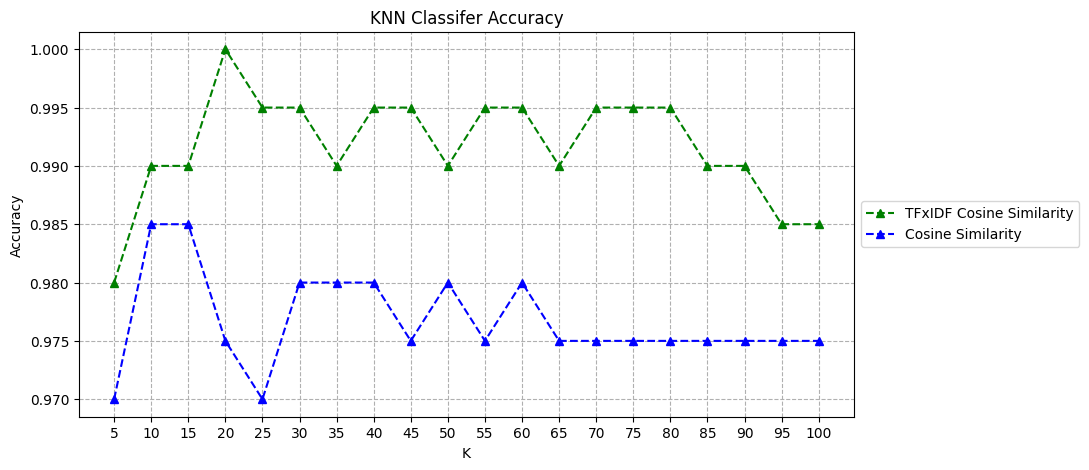

In [145]:
Ks = list(range(5, 101, 5))
plt.figure(figsize=(10, 5))
plt.plot(Ks, tfidf_cosine_similarity, "g^--", label="TFxIDF Cosine Similarity")
plt.plot(Ks, cosine_similarity, "b^--", label="Cosine Similarity")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN Classifer Accuracy")
plt.grid(linestyle="--")
plt.xticks(Ks)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

_First, I calculated the document frequency (DF) from train_df by converting the matrix into boolean values (True if the term count is >0, False if =0), then summing row-wise to obtain the document frequency for each term. Next, I created a matrix with the same shape as train_df, with all values equal to the total number of training documents (NDocs), and used set_printoptions() for better readability since we will be performing log base 2 operations. I then calculated the IDF values and used them to compute TF × IDF weights for both the training and test datasets. For the test data, I applied the IDF values calculated from the training data, as suggested in class, to maintain consistency and avoid data leakage. Finally, similar to part (d), I reran the evaluation for the Cosine similarity version of the classifier across the same range of K values and created a chart comparing the results with and without using TFxIDF weights. The graph shows that using TFxIDF improves accuracy overall for cosine similarity and achieves perfect accuracy of 1.0 at K=20._

#### f. **[10 pts]** Create a new classifier based on the **Rocchio Method (also know as the "nearest centroid" method) adapted for text categorization**. You should separate the training function from the classification function. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype vector. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes. Finally, use your evaluation function to compare your results to the best KNN results you obtained in part **d. [Note: your functions should work regardless of the number of categories (class labels) and should not be limited to two-class categorization scenario. The number of classes should not be hardcoded in your implementation.]**

In [164]:
# Rocchio Classification Implementation
def rocchio_train(train_data, train_labels):
    categories = np.unique(train_labels)
    proto_vec = {}
    
    for label in categories:
        proto_vec[label] = np.zeros(train_data.shape[1], dtype=float)
    
    for i in range(len(train_labels)):
        # add all (terms) values for each document 
        label = train_labels[i]
        proto_vec[label] += train_data[i]
        
    return proto_vec

In [165]:
prototype_vector = rocchio_train(train_X, train_labels_y)
prototype_vector

{np.int64(0): array([57.,  4.,  5., ...,  1.,  2.,  2.], shape=(5500,)),
 np.int64(1): array([45.,  7., 17., ...,  1.,  0.,  0.], shape=(5500,))}

In [170]:
def rocchio_classify(test_instance, prototype_vector):
    similarities = {}
    max_sim = -2
    predicted_class = None

    for label, prototype in prototype_vector.items():
        test_instance_norm = np.linalg.norm(test_instance)
        prototype_norm = np.linalg.norm(prototype)
        # Compute Cosine: divide the dot product of test instance and prototype by the product of the two norms
        if test_instance_norm > 0 and prototype_norm > 0:
            cosine_sims = np.dot(test_instance, prototype) / (test_instance_norm * prototype_norm)
        else:
            cosine_sims = 0.0

        similarities[label] = cosine_sims

        if cosine_sims > max_sim:
            max_sim = cosine_sims
            predicted_class = label
            
    return predicted_class, similarities

In [171]:
rocchio_classify(test_X[0], prototype_vector)

(np.int64(1),
 {np.int64(0): np.float64(0.1583833604068815),
  np.int64(1): np.float64(0.4412988961200159)})

In [174]:
rocchio_classify(test_X[1], prototype_vector)

(np.int64(0),
 {np.int64(0): np.float64(0.2872771676504734),
  np.int64(1): np.float64(0.09611312429340929)})

In [172]:
def rocchio_evaluate(test_data, test_labels, prototype):
    correct_pred = 0
    total_instances = len(test_data)
    for doc in range(total_instances):
        test_data_pred, _ = rocchio_classify(test_data[doc], prototype_vector)
        if test_data_pred == test_labels[doc]:
            correct_pred += 1
    return correct_pred / total_instances

In [175]:
rocchio_accuracy = rocchio_evaluate(test_X, test_labels_y, prototype_vector)
best_KNN_cosine_accuracy = max(cosine_similarity)
best_KNN_euclidean_accuracy = max(euclidean_distance)
print(f'Accuracy of Rocchio Algorithm: {rocchio_accuracy}')
print(f'Best Accuracy of KNN (Cosine Similarity) Algorithm: {best_KNN_cosine_accuracy}')
print(f'Accuracy of KNN (Euclidean Distance) Algorithm: {best_KNN_euclidean_accuracy}')

Accuracy of Rocchio Algorithm: 0.975
Best Accuracy of KNN (Cosine Similarity) Algorithm: 0.985
Accuracy of KNN (Euclidean Distance) Algorithm: 0.85


_I implemented the Rocchio (nearest centroid) method by separating the training, classification and evalutation functions. The training function computes prototype vectors for each categories (class labels) by adding all terms frequencies for each training documents belonging to that class label. The classification function calculates the cosine similarity between a test instance and each prototype vector, then predicts the class with the highest similarity. I tested the classifier on the first two test instances to verify it works correctly, showing both the predicted class and similarity values to each prototype. Finally, I compared the Rocchio classifier's accuracy using the evaluation function against the best KNN results from part (d). The Rocchio method is computationally more efficient than KNN as it only requires computing similarities to class prototypes rather than to all training instances but with the expense of accuracy. However, rocchio accuracy was higher than best KNN accuracy with Euclidean Distance and close to best KNN with Cosine Similarity._

#### f. **[5 pts]** Using scikit-learn's Nearest Centroid classifier to perform classification of the test instances as in the previous part. Compare the classification accuracy of your Rocchio implementation to the classification results using scikit-learn.

In [182]:
from sklearn.neighbors import NearestCentroid

# create and train scikit-learn's Nearest Centroid classifier
sklearn_nearest_centroid = NearestCentroid()
sklearn_nearest_centroid.fit(train_X, train_labels_y)

# predict for test data
sklearn_nc_pred = sklearn_nearest_centroid.predict(test_X)

total_doc = len(test_X)
correct_pred = 0

# calculate accuracy
for doc in range(total_doc):
    if sklearn_nc_pred[doc] == test_labels_y[doc]:
        correct_pred += 1
sklearn_nc_accuracy = correct_pred / total_doc

print(f'Accuracy of scikit-learn Nearest Centroid Algorithm: {sklearn_nc_accuracy}')
print(f'Accuracy of custom Rocchio Algorithm: {rocchio_accuracy}')

Accuracy of scikit-learn Nearest Centroid Algorithm: 0.94
Accuracy of custom Rocchio Algorithm: 0.975


_I used scikit-learn's Nearest Centroid classifier to perform classification on the test data, following the same approach as my custom Rocchio implementation. I then compared the classification accuracy between my implementation and scikit-learn's implementation, I found that my custom implementation scored higher accuracy, most probably because it only supports “euclidean” and “manhattan” metric and uses euclidean by default whereas my custom rocchio algorithm uses cosine similarity._